In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [74]:
### Read the csv data file
df = pd.read_csv('ex1data1.txt',header=None,names=['Population', 'Profit'])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [75]:
## The population entries in the data is in random order. It should be sorted in ascending order for better plots. 
## The scatter plot will not see any effect because of this random order, even the predicted line plot will be unable to
## find any difference. But, if a polynomial fit is applied the order will be used to plot the polynomial fit properly.
## Therefore, this sorted dataframe will be used in the polynomial regression.

df_sorted = df.sort_values(by=['Population']) 
df_sorted.head()

,Population,Profit
74,5.0269,-2.6807
77,5.0365,5.7014
9,5.0546,3.8166
89,5.0594,2.8214
46,5.0702,5.1337


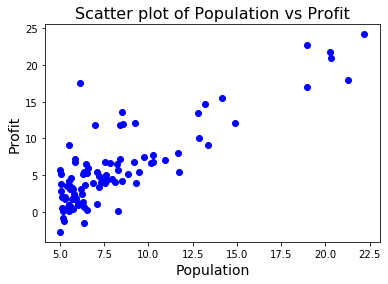

In [76]:
#####   Exercise 1 ###

## Plot the data
plt.scatter(df['Population'], df['Profit'],  color='blue')

## Label the plot
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Population', fontsize=14)
plt.title('Scatter plot of Population vs Profit', fontsize=16)
plt.show()

In [77]:
##### Exercise 2 #####

## Create linear regression object
regr = linear_model.LinearRegression()

## Prepare ther dataset with proper shape
X = df['Population'].to_numpy().reshape(-1,1)
Y = df['Profit'].to_numpy().reshape(-1,1)

## Fit the model
regr.fit(X,Y)

## The coefficients
print('Slope: ', regr.coef_)
print('Intercept: ', regr.intercept_)

## Profit as a function of population is given as : Profit = Slope*Population + Intercept


Slope:  [[1.19303364]]
Intercept:  [-3.89578088]


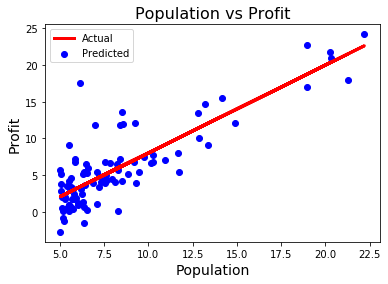

Coefficient of determination: 0.70


In [78]:
### Exercise 3 #### (Part 1: Scatter plot with predicted line)

# Find the predicted values
Y_pred = regr.predict(X)

## Plot the actual and predicted values
plt.scatter(df['Population'], df['Profit'],  color='blue')
plt.plot(X, Y_pred, color='red', linewidth=3)

## Label the plot
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Population', fontsize=14)
plt.title('Population vs Profit', fontsize=16)
plt.legend(['Actual', 'Predicted'])
plt.show()

## Print the R2 score
print('Coefficient of determination: %.2f'  % r2_score(Y, Y_pred))


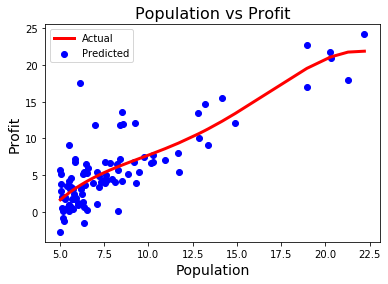

Coefficient of determination: 0.71


In [81]:
### Exercise 3 #### (Part 2: Prediction with higher order polynomial)

from sklearn.preprocessing import PolynomialFeatures

## Prepare data from the sorted dataframe (Use unsorted 'df' dataframe to see the effect of non sorting to the plot)
X = df_sorted['Population'].to_numpy().reshape(-1,1)
Y = df_sorted['Profit'].to_numpy().reshape(-1,1)

## Perform polynomial transform
polyfeat= PolynomialFeatures(degree=4)
X_poly = polyfeat.fit_transform(X)

## Prepare regression model from the transformed values
regr2 = linear_model.LinearRegression()
regr2.fit(X_poly, Y)

## Perform prediction
Y_poly_pred = regr2.predict(X_poly)

## Plot the actual and predicted values
plt.scatter(df['Population'], df['Profit'],  color='blue')
plt.plot(X, Y_poly_pred, color='red', linewidth=3)

## Label the plot
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Population', fontsize=14)
plt.title('Population vs Profit', fontsize=16)
plt.legend(['Actual', 'Predicted'])
plt.show()

## Print the R2 score
print('Coefficient of determination: %.2f'  % r2_score(Y, Y_poly_pred))
